In [1]:
import numpy as np
import pandas as pd
import time
import os
import json
import matplotlib.pyplot as plt
import glob

from pitch_methods import inference, format_onset_offset, get_harmo, get_crepe, visualise_results

In [2]:
"""
Replace this with whatever files you want to use, can also put into a loop or something
"""
audio_path = 'example_audio.wav'
test_transcription = '锄禾日当午，汗滴禾下土。谁知盘中餐，粒粒皆辛苦。'

In [3]:
"""
I'm putting all the calculations in this cell
"""
raw_dict = inference(audio_path, test_transcription)
onset_times = format_onset_offset(raw_dict)
df_harmo = get_harmo(audio_path, onset_times)
df_crepe = get_crepe(audio_path, onset_times, shortest_slice = 10)

pronunciation_assessment_result


100%|██████████| 1/1 [00:00<00:00, 27.95it/s]


2/2 [==============================] - 0s 100ms/step
rescale conf
using energy


c:\ProgramData\anaconda3\envs\pitch_tracker_5228\lib\site-packages\torch\functional.py:660: UserWarning: A window was not provided. A rectangular window will be applied,which is known to cause spectral leakage. Other windows such as torch.hann_window or torch.hamming_window can are recommended to reduce spectral leakage.To suppress this warning and use a rectangular window, explicitly set `window=torch.ones(n_fft, device=<device>)`. (Triggered internally at ..\aten\src\ATen\native\SpectralOps.cpp:843.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]


energy [0.         0.00383954 0.79699987 0.87394919 1.        ]
removing outliers
smoothing curve


In [4]:
"""
Collecting all the outputs in a dict, then I'll use this dict to plot.
I think can standardise the outputs as t, f, weight.
If you've other ideas for what info might be useful, can add on later.
I'm identifying each method by a name, e.g. 'harmo', 'crepe', then using this to label the graph.
"""
harmo_dict = {'t': df_harmo['t'],
              'f': df_harmo['f'],
              'weight': df_harmo['act']}
crepe_dict = {'t': df_crepe['t'],
              'f': df_crepe['f0'],
              'weight': df_crepe['conf']}
methods_dict = {'harmo': harmo_dict,
                'crepe': crepe_dict}


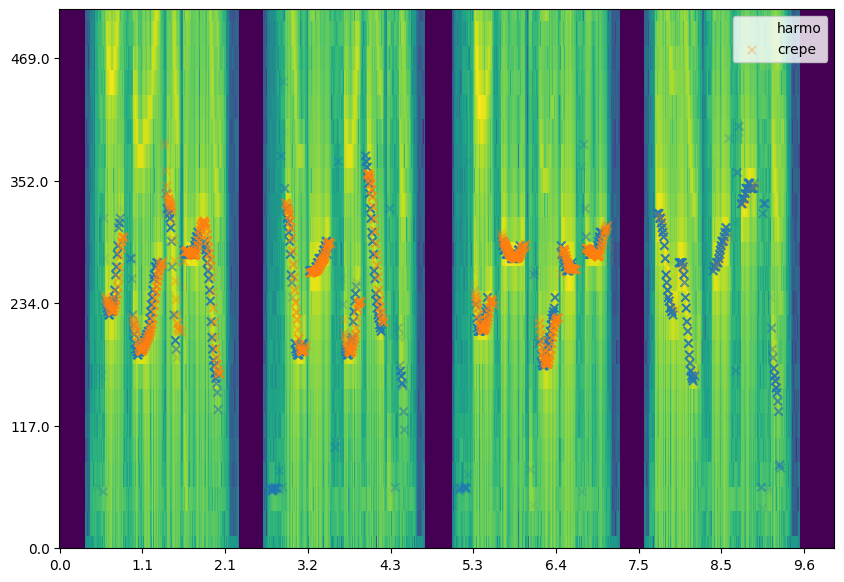

In [5]:
visualise_results(audio_path, methods_dict, cutoff = 500, filename = None)